In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
from pandas import DataFrame,Series
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.stats as stats
import pylab as pl
from random import sample

In [3]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins. 

In [4]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

In [5]:
df['color'] = Series([(0 if x == "walking" else 1) for x in df['Label']])
my_color_map = ListedColormap(['skyblue','coral'],'mycolormap')
#0,red,walking
#1,green,running

df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 47)

In [6]:
X_train = df_unique.values[:,2:45]
Y_train = df_unique.values[:,45]

In [7]:
test_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile_10.csv")
df_test = pd.read_csv(test_file)
df_test.head()
df_test.shape#(no of rows, no of columns)

(518, 46)

In [8]:
df_test['color'] = Series([(0 if x == "walking" else 1) for x in df_test['Label']])

In [9]:
df_unique_test = df_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
df_unique_test.shape

(415, 47)

In [10]:
df_gini_two = DecisionTreeClassifier(criterion = 'gini')

In [11]:
df_3_10 = pd.concat([df_unique,df_unique_test])
df_3_10.shape

(821, 47)

In [12]:
X = df_3_10.values[:,2:45]
y = df_3_10.values[:,45]

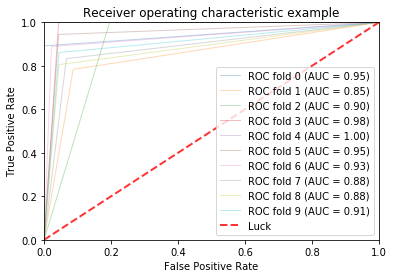

In [122]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

j = 0
for train, test in cv.split(X, y):
    probas_ = df_gini.fit(X[train], y[train]).predict_proba(X[test])
    
    num_labels = []
    for i in range(0,len(y[test])):
        if y[test][i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    labels = np.array(num_labels)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(labels, probas_[:, 0])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (j, roc_auc))
    j += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

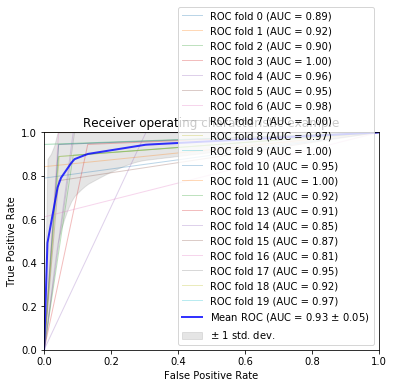

In [121]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=20)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

j = 0
for train, test in cv.split(X, y):
    probas_ = df_gini.fit(X[train], y[train]).predict_proba(X[test])
    
    num_labels = []
    for i in range(0,len(y[test])):
        if y[test][i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    labels = np.array(num_labels)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(labels, probas_[:, 0])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (j, roc_auc))
    j += 1
    


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - 15 people data as both training and test

In [18]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [19]:
X = df_3_10.values[:,2:45]
y = df_3_10.values[:,45]

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)

In [22]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
#Predicting using test data
Y_predict_gini = df_gini.predict(X_test)

In [24]:
#Calculating accuracy score
score = accuracy_score(Y_test,Y_predict_gini)
score

0.96356275303643724

In [25]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_predict_gini)
cm

array([[ 95,   6],
       [  3, 143]])

In [27]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


def plot_roc_curve(Y_predict_gini,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict_gini)):
        if Y_predict_gini[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('./../Data-Visualization/images/' + name_graph +'.png',dpi=1000)

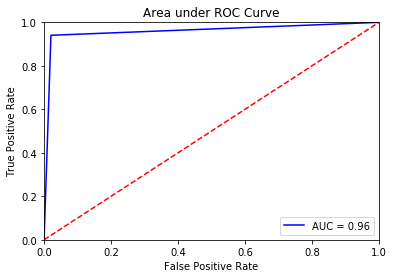

In [28]:
plot_roc_curve(Y_predict_gini,Y_test,"Area_under_roc_15")

In [14]:
#Predicting using test data
Y_predict_gini_probas = df_gini.predict_proba(X_test_small)
print (Y_predict_gini_probas[:,0])
print (Y_predict_gini_probas[:,1])
print(len(Y_predict_gini_probas))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [71]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


def plot_roc_curve(Y_predict_gini,Y_test,name_graph):
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels,Y_predict_gini)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('./../Data-Visualization/images/' + name_graph +'.png',dpi=1000)

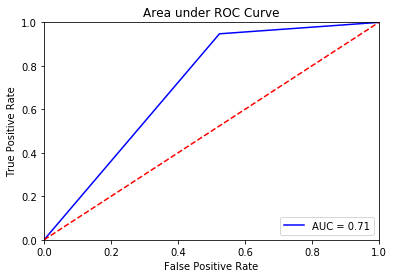

In [72]:
plot_roc_curve(Y_predict_gini_probas[:,0],Y_test_small,"DecisionTree_ROC_using_predict_proba")